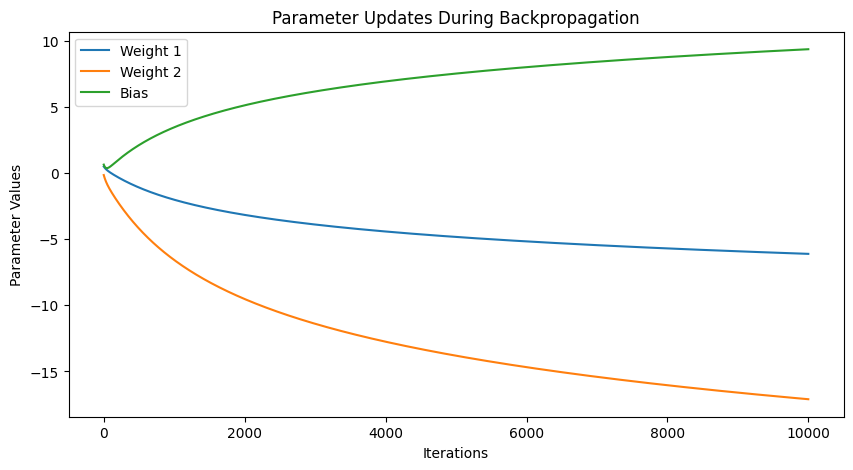

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sig_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

def for_prop(X,w,b):
    z = np.dot(w,X) + b
    a = sigmoid(z)
    return z,a

def back_prop(X, y, w, b, z, a, alpha): #Alpha is the learning rate
    m = X.shape[1]
    dz = a - y
    dw = 1/m*(np.dot(dz,X))
    db = 1/m *(np.sum(dz))
    w  -= alpha*dw
    b  -= alpha*db

    return w,b,dw,db

np.random.seed(42)  # Why 42 to generate random number? ---> Douglas Adam's science fiction The Hitchhiker's Guide to the Galaxy --> Answer to everything is 42
w = np.random.randn(1,2)
b = np.random.randn(1)
alpha = 0.1

X = np.array([[0.1, 0.2], [0.3, 0.7]])
y = np.array([[1, 0]])

epochs = 10000

weight_history = []
bias_history = []


for i in range(epochs):
    z,a = for_prop(X,w,b)
    w,b,dw,db = back_prop(X,y,w,b,z,a,alpha)
    weight_history.append(w.copy())
    bias_history.append(b.copy())

plt.figure(figsize=(10, 5))
plt.plot(range(epochs), [w[0][0] for w in weight_history], label="Weight 1")
plt.plot(range(epochs), [w[0][1] for w in weight_history], label="Weight 2")
plt.plot(range(epochs), bias_history, label="Bias")
plt.xlabel("Iterations")
plt.ylabel("Parameter Values")
plt.title("Parameter Updates During Backpropagation")
plt.legend()
plt.show()


